### Which ML-algorithms are used?
### Classification Problem<br>
Random Forest (RandomForestClassifier)<br>
funktionier mit Abstand am besten, daher unterschiedliche Konfiguartionen von Random Foret

###  Datensatz
https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data <br>

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.reset_index(drop=True, inplace=True)
X = df.drop('target', axis=1)
y = df['target']

k=10 

kf = KFold(n_splits=k, shuffle=True, random_state=85) #
#skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


### Show fold distribution

In [3]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print()

Fold 1
Train Index: [   0    1    2 ... 1187 1188 1189]
Test Index: [   4   21   22   23   45   73   75   85   93  115  116  128  135  136
  139  156  160  172  186  188  201  203  205  220  236  240  273  279
  289  305  311  314  325  326  342  344  346  349  352  397  406  412
  416  434  450  453  481  488  516  518  527  537  544  585  596  606
  617  622  642  671  672  674  676  682  684  692  695  711  736  737
  740  752  753  757  769  775  779  794  822  850  859  862  884  889
  890  923  931  939  942  960  967 1006 1013 1029 1041 1046 1047 1050
 1051 1055 1056 1059 1070 1078 1082 1111 1114 1130 1138 1143 1144 1149
 1165 1169 1172 1173 1175 1176 1180]

Fold 2
Train Index: [   1    2    3 ... 1187 1188 1189]
Test Index: [   0    5   18   28   42   49   61   72   83   91   98  104  106  146
  149  150  153  170  180  202  206  211  214  219  239  241  244  260
  266  276  290  292  321  331  332  333  334  335  338  355  375  386
  399  407  408  415  421  427  430  435  437

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [5]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier2 = RandomForestClassifier()
rf_classifier3 = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier4 = RandomForestClassifier(n_estimators=400, random_state=42)
rf_classifier5 = RandomForestClassifier(n_estimators=1000, random_state=42)
#hist_gb=HistGradientBoostingClassifier(random_state=42)

In [6]:
rf_classifier_cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='f1').mean()
rf_classifier_cross_val_scores2 = cross_val_score(rf_classifier2, X, y, cv=kf, scoring='f1').mean()
rf_classifier_cross_val_scores3 = cross_val_score(rf_classifier3, X, y, cv=kf, scoring='f1').mean()
rf_classifier_cross_val_scores4 = cross_val_score(rf_classifier4, X, y, cv=kf, scoring='f1').mean()
rf_classifier_cross_val_scores5 = cross_val_score(rf_classifier5, X, y, cv=kf, scoring='f1').mean()
#hist_gb_cross_val_scores = cross_val_score(hist_gb, X, y, cv=kf, scoring='f1').mean()


In [7]:
cross_val_scores = {
    'rf_classifier': rf_classifier_cross_val_scores,
    'rf_classifier2': rf_classifier_cross_val_scores2,
    'rf_classifier3': rf_classifier_cross_val_scores3,
    'rf_classifier4': rf_classifier_cross_val_scores4,
    'rf_classifier5': rf_classifier_cross_val_scores5
}

sorted_cross_val_scores = sorted(cross_val_scores.items(), key=lambda x: x[1], reverse=True)

for i, (model, score) in enumerate(sorted_cross_val_scores, start=1):
    rounded_score = round(score, 3)
    print(f"{i}. {model}: {rounded_score}")

1. rf_classifier5: 0.94
2. rf_classifier4: 0.938
3. rf_classifier: 0.937
4. rf_classifier2: 0.932
5. rf_classifier3: 0.931


In [8]:
import matplotlib.pyplot as plt

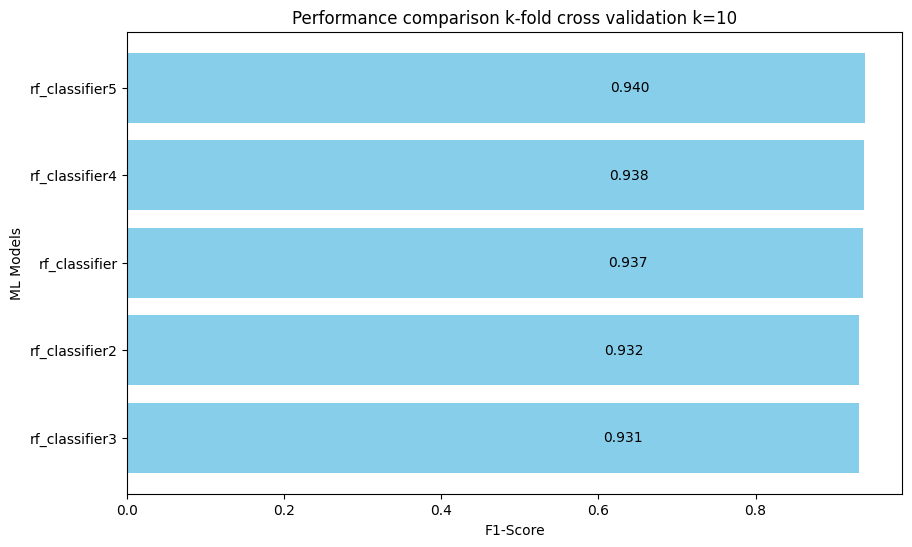

In [9]:
models = [model for model, _ in sorted_cross_val_scores]
scores = [score for _, score in sorted_cross_val_scores]

plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('F1-Score')
plt.ylabel('ML Models')
plt.title('Performance comparison k-fold cross validation k=10')
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', ha='center', color='black')

plt.gca().invert_yaxis()  
plt.show()


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [11]:
all_fold_scores = {model: [] for model in ['rf_classifier', 'rf_classifier2', 'rf_classifier3', 'rf_classifier4', 'rf_classifier5']}
placement_history = {model: [] for model in all_fold_scores.keys()}
mean_scores_history = {model: [] for model in all_fold_scores.keys()}  

for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"Fold {fold_idx}:")
    
    #X_train, X_test = X[train_idx], X[test_idx]
    #y_train, y_test = y[train_idx], y[test_idx]
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
  
    rf_classifier.fit(X_train, y_train)
    rf_classifier2.fit(X_train, y_train)
    rf_classifier3.fit(X_train, y_train)
    rf_classifier4.fit(X_train, y_train)
    rf_classifier5.fit(X_train, y_train)
    

    rf_classifier_score = f1_score(y_test, rf_classifier.predict(X_test))
    rf_classifier_score2 = f1_score(y_test, rf_classifier2.predict(X_test))
    rf_classifier_score3 = f1_score(y_test, rf_classifier3.predict(X_test))
    rf_classifier_score4 = f1_score(y_test, rf_classifier4.predict(X_test))
    rf_classifier_score5 = f1_score(y_test, rf_classifier5.predict(X_test))

  
    
    all_fold_scores['rf_classifier'].append(rf_classifier_score)
    all_fold_scores['rf_classifier2'].append(rf_classifier_score2)
    all_fold_scores['rf_classifier3'].append(rf_classifier_score3)
    all_fold_scores['rf_classifier4'].append(rf_classifier_score4)
    all_fold_scores['rf_classifier5'].append(rf_classifier_score5)

    cross_val_scores_actual_fold = {
        'rf_classifier': rf_classifier_score,
        'rf_classifier2': rf_classifier_score2,
        'rf_classifier3': rf_classifier_score3,
        'rf_classifier4': rf_classifier_score4,
        'rf_classifier5': rf_classifier_score5
    }
    
    sorted_cross_val_scores_actual_fold = sorted(cross_val_scores_actual_fold.items(), key=lambda x: x[1], reverse=True)

    for i, (model, score) in enumerate(sorted_cross_val_scores_actual_fold, start=1):
        rounded_score = round(score, 3)
        print(f"{i}. {model}: {rounded_score}")

    mean_scores = {model: np.mean(scores) for model, scores in all_fold_scores.items()}
    sorted_mean_scores = sorted(mean_scores.items(), key=lambda x: x[1], reverse=True)

    print()  

    for i, (model, mean_score) in enumerate(sorted_mean_scores, start=1):
        print(f"{i}. Average for {model} after {fold_idx} Folds: {round(mean_score, 3)}")
        placement_history[model].append(i)
        mean_scores_history[model].append(round(mean_score, 3))  
        
    print()



Fold 1:
1. rf_classifier: 0.952
2. rf_classifier4: 0.951
3. rf_classifier5: 0.945
4. rf_classifier3: 0.944
5. rf_classifier2: 0.938

1. Average for rf_classifier after 1 Folds: 0.952
2. Average for rf_classifier4 after 1 Folds: 0.951
3. Average for rf_classifier5 after 1 Folds: 0.945
4. Average for rf_classifier3 after 1 Folds: 0.944
5. Average for rf_classifier2 after 1 Folds: 0.938

Fold 2:
1. rf_classifier: 0.92
2. rf_classifier3: 0.92
3. rf_classifier4: 0.912
4. rf_classifier5: 0.912
5. rf_classifier2: 0.911

1. Average for rf_classifier after 2 Folds: 0.936
2. Average for rf_classifier3 after 2 Folds: 0.932
3. Average for rf_classifier4 after 2 Folds: 0.932
4. Average for rf_classifier5 after 2 Folds: 0.929
5. Average for rf_classifier2 after 2 Folds: 0.924

Fold 3:
1. rf_classifier4: 0.917
2. rf_classifier2: 0.908
3. rf_classifier5: 0.898
4. rf_classifier: 0.891
5. rf_classifier3: 0.891

1. Average for rf_classifier4 after 3 Folds: 0.927
2. Average for rf_classifier after 3 Folds

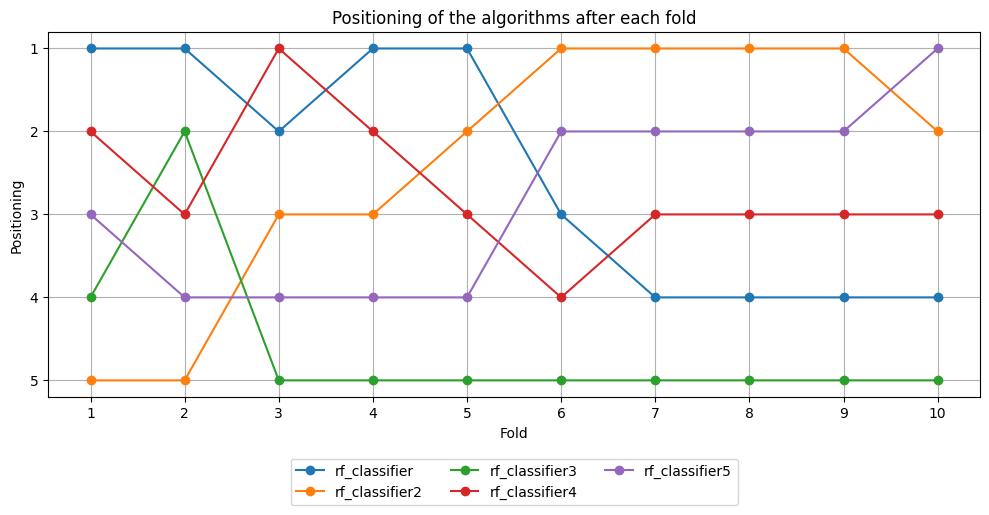

In [12]:
plt.figure(figsize=(10, 6))
for model, placements in placement_history.items():
    plt.plot(range(1, len(placements) + 1), placements, marker='o', label=model)

plt.gca().invert_yaxis()  
plt.xticks(range(1, kf.get_n_splits() + 1))
plt.yticks(range(1, max(max(placements) for placements in placement_history.values()) + 1))  

plt.xlabel('Fold')
plt.ylabel('Positioning')
plt.title('Positioning of the algorithms after each fold')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()


In [13]:
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [16]:

# Genauigkeiten der 10 Folds für alle Algorithmen
acc_rf = mean_scores_history['rf_classifier']
acc_rf2 = mean_scores_history['rf_classifier2']
acc_rf3 = mean_scores_history['rf_classifier3']
acc_rf4 = mean_scores_history['rf_classifier4']
acc_rf5 = mean_scores_history['rf_classifier5']

best_model_name = sorted_cross_val_scores[0][0]

if best_model_name == 'rf_classifier':
    acc_best = acc_rf
elif best_model_name == 'rf_classifier2':
    acc_best = acc_rf2
elif best_model_name == 'rf_classifier3':
    acc_best = acc_rf3
elif best_model_name == 'rf_classifier4':
    acc_best = acc_rf4
elif best_model_name == 'rf_classifier5':
    acc_best = acc_rf5


def find_earliest_significant_fold_ttest(acc_best, acc):
    for i in range(len(acc_best)):
        t_stat, p_value = ttest_ind(acc_best[:i+1], acc[:i+1],alternative='greater')                                                                 
        if p_value < 0.05:  
            return i+1, p_value
    return None, None

def find_earliest_significant_fold_manwhitneyu(acc_best, acc):
    for i in range(len(acc_best)):
        t_stat, p_value = mannwhitneyu(acc_best[:i+1], acc[:i+1],alternative='greater')                                                              
        if p_value < 0.05:  
            return i+1, p_value
    return None, None

algorithms = {
    'rf_classifier': acc_rf,
    'rf_classifier2': acc_rf2,
    'rf_classifier3': acc_rf3,
    'rf_classifier4': acc_rf4,
    'rf_classifier5': acc_rf5
}

print("T-Test:")
for algo_name, acc in algorithms.items():
    if acc_best != acc:
        fold, p_value = find_earliest_significant_fold_ttest(acc_best, acc)
        if fold:
            print(f"{best_model_name}  is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")

print("Mann-Whitney-U-Test:")
for algo_name, acc in algorithms.items():
    if acc_best != acc:
        fold, p_value = find_earliest_significant_fold_manwhitneyu(acc_best, acc)
        if fold:
            print(f"{best_model_name} is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")

T-Test:
rf_classifier5 is not significantly better than rf_classifier within 10 folds.
rf_classifier5 is not significantly better than rf_classifier2 within 10 folds.
rf_classifier5 is not significantly better than rf_classifier3 within 10 folds.
rf_classifier5 is not significantly better than rf_classifier4 within 10 folds.
Mann-Whitney-U-Test:
rf_classifier5 is not significantly better than rf_classifier within 10 folds.
rf_classifier5 is not significantly better than rf_classifier2 within 10 folds.
rf_classifier5 is not significantly better than rf_classifier3 within 10 folds.
rf_classifier5 is not significantly better than rf_classifier4 within 10 folds.


### **Evaluation**

The results can be evaluated in three ways:<br>
1.interpretation of the diagram <br>
2.Statistical significance using t-tests<br>
3. statistical significance using the Mann-Whitney U-test<br>
<br>
In the diagram we can already see from the **6 fold** that the Random Forest Classifier is better than all the others.
In the tests, however, only from the **10 fold** onwards